## In Class Jupyter Assignment #1
### Brooks Tawil

#### Set 1

In [10]:
# Load Dataset
import numpy as np
from sklearn.datasets import load_boston

boston, target = load_boston(True)

print (boston.data.shape)
print (target.shape)

(506, 13)
(506,)


1. Implement least-squares (LS) regression -- 5 pts

In [11]:
# Part 1, LS Regression
# w = (X^T X)^-1 X^T Y

# Form data and targets as column-wise to the datapoints
X = np.column_stack((np.array(boston), np.ones((506,1))))
Y = np.array(target)

w = (np.linalg.inv((X.T @ X)) @ X.T) @ Y

print (w)

# Use the found w to calculate y' on the test set
yHat = np.matmul(X, w)

# Caluculate error
sumSquare = 0
for i in range(len(yHat)):
    sumSquare += np.square(np.subtract(yHat[i], Y[i]))    
sumSquare = sumSquare/len(yHat)


print ('Test Set Error ' + str(sumSquare))
print ()

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01  3.64594884e+01]
Test Set Error 21.89483118172919



2. Carry out LS regression on the house prices dataset using 5-fold cross validation and report the average prediction error -- 10pts

In [15]:
# Part 2, Cross Validation
# 5 - fold Cross valiation
# k = 5 = len(blocks)

blocks = [[],[],[],[],[]]
targets = [[],[],[],[],[]]
errors = []
w_s = []
count = 0

# Assign indices to the data for shuffling
indices = []
for i in range(len(X)):
    indices.append(i)
import random
random.shuffle(indices)

# Split the data and targets into seperate blocks
for index in indices:    
    blocks[count].append(X[index])
    targets[count].append(Y[index])
    
    count += 1
    if(count == 5):
        count = 0

# i is an identifier as to which block is the test set
for i in range(len(blocks)):
    # Separate training_set
    training_set = []
    training_targets = []
    for j in range(5):
        if(i != j):
            for k in range(len(blocks[j])):
                training_set.append(blocks[j][k])
                training_targets.append(targets[j][k])
      
    # From the test_set
    test_set = np.array(blocks[i])
    test_targets = np.array(targets[i])
    training_set = np.array(training_set)
    training_targets = np.array(training_targets)
    
    '''
    print (test_set.shape)
    print (test_targets.shape)
    print (training_set.shape)
    print (training_targets.shape)
    '''
    
    # Run the LS regression on the training sets to get a w
    w = np.matmul(np.matmul(np.linalg.inv(np.matmul(training_set.T,training_set)), training_set.T), training_targets)
    
    # Use the found w to calculate y' on the test set
    yHat = np.matmul(test_set, w)
    
    # Calculate the LS error 
    sumSquare = 0
    for j in range(len(test_set)):
        sumSquare += np.square(np.subtract(test_targets[i], yHat[i]))
    sumSquare = sumSquare/len(test_set)
    
    print ('Test Set ' + str(i) + ' Error: ' + str(sumSquare))
    errors.append(sumSquare)
    
    w_s.append(w)
    
print ('Errors: ' + str(errors))
print ('Average prediction error: \t' + str(np.mean(errors)))

# Get the w that gives the smallest error
minError = np.inf
minError_index = 0
for i in range(len(errors)):
    if errors[i] < minError:
        minError = errors[i]
        minError_index = i

w_s = np.array(w_s) 
best_w = w_s[minError_index]

# With the best w, run across the whole set like before and find the error
# Use the found w to calculate y' on the test set
yHat = np.matmul(X, best_w)

# Caluculate error using the best w
sumSquare = 0
for i in range(len(yHat)):
    sumSquare += np.square(np.subtract(yHat[i], Y[i]))
sumSquare = sumSquare/len(yHat)

print ('Mean error using best w: \t' + str(sumSquare))
print ()

Test Set 0 Error: 47.47222146724526
Test Set 1 Error: 16.892474479472657
Test Set 2 Error: 15.515189346024712
Test Set 3 Error: 20.180975991887365
Test Set 4 Error: 17.723657839034153
Errors: [47.47222146724526, 16.892474479472657, 15.515189346024712, 20.180975991887365, 17.723657839034153]
Average prediction error: 	23.55690382473283
Mean error using best w: 	22.43616242945742



3. Provide a plot of "Measured versus Predicted" values and overlay on top of this a line with slope 1 -- 5 pts

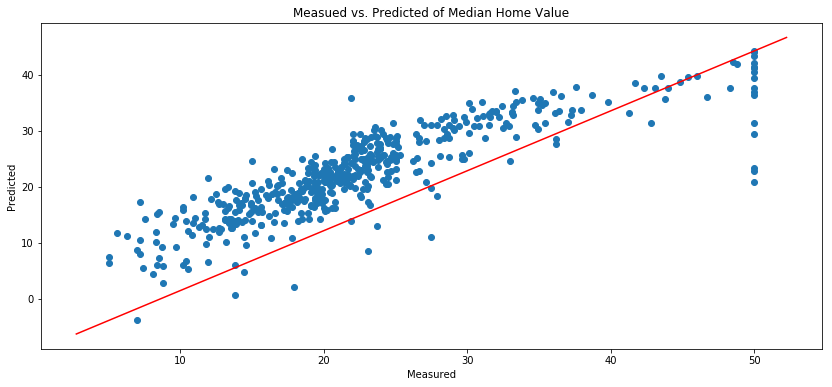

In [16]:
# Part 3, Graph Predicted vs. Measured
# yHat is the Predicted
# Y is the Measured

import matplotlib.pyplot as plt

x_axis = []
for i in range(len(Y)):
    x_axis.append(i)

plt.figure(figsize=(14, 6))
plt.title('Measued vs. Predicted of Median Home Value')
plt.scatter(Y, yHat)
plt.xlabel('Measured')
plt.ylabel('Predicted')
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_ylim(), 'r')
plt.show()

#### Set 2

1. Implement ridge regression -- 2.5 pts

In [5]:
# Ridge Regression
# w = (X′X + λI)^−1 X′Y

# The Lambda will have to be tested using cross validation, for now I've left as 1
lam = 1

# Get the weight vector using the lambda
w = np.linalg.inv(np.add(X.T @ X,(lam * np.identity(X.shape[1])))) @ X.T @ Y

print (w)

[-9.86048066e-02  4.82554320e-02 -8.77533496e-03  2.65452916e+00
 -6.28879951e+00  4.86927445e+00 -6.65674913e-03 -1.16424615e+00
  2.30512930e-01 -1.12443314e-02 -6.30840387e-01  1.22963608e-02
 -4.77294333e-01  1.56705427e+01]


2. Carry out ridge regression on the house prices dataset by learning lambda using 5-fold cross validation, where one of the folds is reserved for final testing, and report the average prediction error -- 7.5 pts

In [72]:
# Part 2
# Cross Validate to find lambda

blocks = [[],[],[],[],[]]
targets = [[],[],[],[],[]]

# Assign indices to the data for shuffling
indices = []
for i in range(len(X)):
    indices.append(i)
import random
random.shuffle(indices)

# Split the data and targets into seperate blocks
count = 0
for index in indices:    
    blocks[count].append(X[index])
    targets[count].append(Y[index])
    count += 1
    if(count == 5):
        count = 0
        
# Reserve one of the folds for testing later
final_test_block = blocks[len(blocks) - 1]
final_test_targets = blocks[len(blocks) - 1]

# Discretize Lambda
lambda_list = np.linspace(0,2,100)
    
# Make a matrx to keep track of errors across runs
errors = [[] for i in range(len(lambda_list))]
w_s =  [[] for i in range(len(lambda_list))]

# This part is simply about finding the best lambda
# For each of the lambdas, cross validate
# i is an identifier for which lambda value is being used
for L in range(len(lambda_list)):
    # print ('Lamba: ' + str(lambda_list[L]))
    # i is an identifier for which block in the cross validation we are using
    for i in range(len(blocks)):
        # Separate training_set
        training_set = []
        training_targets = []
        for j in range(5):
            if(i != j):
                for k in range(len(blocks[j])):
                    training_set.append(blocks[j][k])
                    training_targets.append(targets[j][k])

        # From the test_set
        test_set = np.array(blocks[i])
        test_targets = np.array(targets[i])
        training_set = np.array(training_set)
        training_targets = np.array(training_targets)

        # Run the Ridge Regression on the training sets to get a w
        w = np.linalg.inv(np.add(X.T @ X,(lambda_list[L] * np.identity(X.shape[1])))) @ X.T @ Y

        # Use the found w to calculate y' on the test set
        yHat = np.matmul(test_set, w)

        # Calculate the RR error 
        sumSquare = 0
        for j in range(len(test_set)):
            sumSquare += np.square(np.subtract(test_targets[i], yHat[i]))
        sumSquare = sumSquare/len(test_set)

        errors[L].append(sumSquare)

    errors[L] = np.array(errors[L])
    
errors = np.array(errors)
mean_errors = np.mean(errors, 1)

# Find the lambda that gives the lowest Average prediction error
minError = np.inf
best_lambda = 0
for i in range(len(mean_errors)):
    if mean_errors[i] < minError:
        minError = mean_errors[i]
        best_lambda = lambda_list[i]

print ('Best Lambda is: ', best_lambda)

Best Lambda is:  0.5656565656565657


In [80]:
# Using the best lamda, we can run a final cross validation 
errors = []
w_s = []
count = 0

# i is an identifier for which block in the cross validation we are using
for i in range(len(blocks)):
    # Separate training_set
    training_set = []
    training_targets = []
    for j in range(5):
        if(i != j):
            for k in range(len(blocks[j])):
                training_set.append(blocks[j][k])
                training_targets.append(targets[j][k])

    # From the test_set
    test_set = np.array(blocks[i])
    test_targets = np.array(targets[i])
    training_set = np.array(training_set)
    training_targets = np.array(training_targets)
    
    # Run the Ridge Regression on the training sets to get a w
    w = np.linalg.inv(np.add(X.T @ X,(best_lambda * np.identity(X.shape[1])))) @ X.T @ Y

    # Use the found w to calculate y' on the test set
    yHat = np.matmul(test_set, w)

    # Calculate the RR error 
    sumSquare = 0
    for j in range(len(test_set)):
        sumSquare += np.square(np.subtract(test_targets[i], yHat[i]))
    sumSquare = sumSquare/len(test_set)
    w_s.append(w)
    errors.append(sumSquare)

errors = np.array(errors)

# Get the w that gives the smallest error
minError = np.inf
minError_index = 0
for i in range(len(errors)):
    if errors[i] < minError:
        minError = errors[i]
        minError_index = i
        best_w = w_s[i]
        
print ('Errors: ' + str(errors))
print ('Average prediction error: \t' + str(np.mean(errors)))

# Use that w on the final training set and report the error
yHat = np.matmul(final_test_block, best_w)

# Caluculate error using the best w against the final testing set
sumSquare = 0
for i in range(len(final_test_block)):
    sumSquare += np.square(np.subtract(yHat[i], final_test_targets[i]))
sumSquare = sumSquare/len(yHat)

print ('Mean error using best w: \t' + str(sumSquare))

Errors: [ 3.29156191  1.75435562 47.14414671  2.23838874  8.71816721]
Average prediction error: 	12.629324039376504
Mean error using best w: 	17.452170388843236

